Построить 5 графиков по выбранным данным.

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
players = pd.read_csv('Players.csv')
players.head(5)
seasons_stats = pd.read_csv('Seasons_Stats.csv')
# seasons_stats.head(5)

### График 1
ТОП 10 штатов, родом из которых игроки NBA

На графике наглядно видно штаты, в которых родилось больше всего игроков NBA.

Text(0.5, 1.0, 'Top 10 birth_state')

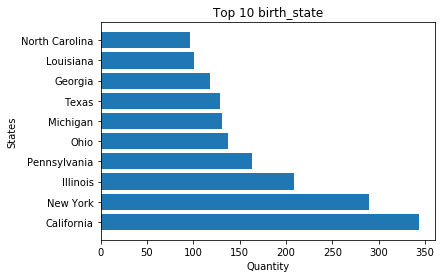

In [6]:
players_barh = players.groupby('birth_state').count()[['Player']].sort_values('Player', ascending=False).reset_index().head(10)
plt.barh(players_barh['birth_state'], players_barh['Player'])
plt.xlabel('Quantity')
plt.ylabel('States')
plt.title('Top 10 birth_state')

### График 2
Количество команд NBA по годам.

Text(0, 0.5, 'Teams')

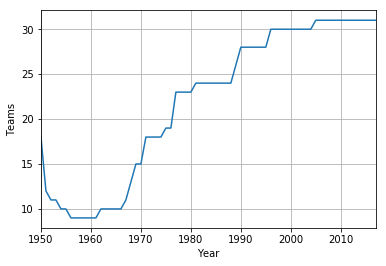

In [22]:
age_dinamics = seasons_stats.groupby(['Year'])['Tm'].nunique()
age_dinamics
age_dinamics.plot()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Teams')

### График 3
Зависимость веса и роста игрока

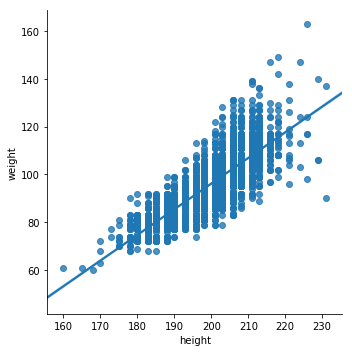

In [31]:
import seaborn as sns
sns_plot = sns.lmplot(x = 'height', y = 'weight', data = players)
sns_plot

### График 4

Возраст игроков в 1950 и в 2017 годах

In [34]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [102]:
players17 = seasons_stats[seasons_stats['Year'] == 2017].drop_duplicates(subset="Player").groupby(['Age']).count()['Player']
players50 = seasons_stats[seasons_stats['Year'] == 1950].drop_duplicates(subset="Player").groupby(['Age']).count()['Player']

In [103]:
trace0 = go.Box(y=players17.index, name = '2017')
trace1 = go.Box(y=players50.index, name = '1950')
data = [trace0, trace1]
iplot(data)

### График 5
Средний, максимальный и минимальный рост игроков по годам

In [128]:
joined = seasons_stats.merge(players, on='Player', how = 'left')[['Year', 'Player', 'height']].drop_duplicates(subset="Player")
joined.head(5)
mean_h = joined.groupby('Year').mean()
max_h = joined.groupby('Year').max()
min_h = joined.groupby('Year').min()

In [130]:
mean_height = go.Scatter(x=list(mean_h.index), y=list(mean_h["height"]), mode = 'lines',
    name = 'mean height')
max_height = go.Scatter(x=list(max_h.index), y=list(max_h["height"]), mode = 'markers',
    name = 'max height')
min_height = go.Scatter(x=list(min_h.index), y=list(min_h["height"]), mode = 'markers',
    name = 'min height')
data = [mean_height, max_height, min_height]
iplot(data, filename='line-mode')